In [ ]:
from app import database
import pandas as pd
from app import config


database.drop_all()
database.create_all()
database.models.Meta.insert(
    pd.read_excel(
        config.DATABASE_EXC, 
        sheet_name="tb_meta", 
        parse_dates=["inception_date"]
    )
)


In [4]:
from src import database

universe = database.query.universe(name="US GICS Sectors")

universe

,date,code,name
0,1998-12-22,XLB,Materials Select Sector SPDR Fund
1,1998-12-22,XLE,Energy Select Sector SPDR Fund
2,1998-12-22,XLF,Financial Select Sector SPDR Fund
3,1998-12-22,XLI,Industrial Select Sector SPDR Fund
4,1998-12-22,XLK,Technology Select Sector SPDR Fund
5,1998-12-22,XLP,Consumer Staples Select Sector SPDR Fund
6,1998-12-22,XLU,Utilities Select Sector SPDR Fund
7,1998-12-22,XLV,Health Care Select Sector SPDR Fund
8,1998-12-22,XLY,Consumer Discretionary Select Sector SPDR Fund
9,2015-10-08,XLB,Materials Select Sector SPDR Fund


In [5]:
tickers = universe.code.unique()
tickers

array(['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY',
       'XLRE', 'XLC'], dtype=object)

In [7]:
import yfinance as yf

yf.download(list(tickers))["Adj Close"]

[*********************100%***********************]  11 of 11 completed


,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
1998-12-22,12.128878,NaN,12.650475,11.717179,15.092496,24.345808,15.175957,NaN,12.786777,17.650040,19.223661
1998-12-23,12.256255,NaN,12.913849,11.889956,15.355854,24.927443,15.542827,NaN,12.733186,18.046679,19.306217
1998-12-24,12.538323,NaN,12.845880,11.968489,15.558435,24.832485,15.515983,NaN,12.967622,18.156841,19.660015
1998-12-28,12.429140,NaN,12.777917,11.811424,15.639465,24.903694,15.426499,NaN,12.900637,17.892431,19.483118
1998-12-29,12.656607,NaN,12.905356,11.937072,15.862315,24.974922,15.766529,NaN,13.114978,18.289059,19.907688
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09,78.680000,58.549999,80.260002,32.259998,99.370003,150.000000,76.709999,37.060001,68.730003,132.410004,147.649994
2023-05-10,78.730003,59.070000,79.349998,32.080002,99.010002,151.830002,76.589996,37.410000,69.360001,132.779999,148.399994
2023-05-11,77.959999,59.660000,78.400002,32.029999,98.410004,151.149994,76.820000,37.020000,68.650002,132.369995,149.089996


In [3]:
import databases
from src.config import DATABASE_URL
from src.database.models import Meta

database = databases.Database(DATABASE_URL)


await database.connect()

async def test():
    
    query = Meta.__table__.select().filter(Meta.id == 1)
    print(query)
    
    
    ff = await database.fetch_all(query=query)
    print(ff)

    return ff


for record in await test():
    
    print(vars(record))

await database.disconnect()


SELECT tb_meta.memo, tb_meta.created_date, tb_meta.last_modified_date, tb_meta.id, tb_meta.code, tb_meta.category, tb_meta.instrument, tb_meta.isin, tb_meta.name, tb_meta.description, tb_meta.deactive, tb_meta.source, tb_meta.yahoo, tb_meta.naver, tb_meta.bloomberg, tb_meta.morningstar, tb_meta.reuters 
FROM tb_meta 
WHERE tb_meta.id = :id_1
{}


[*********************100%***********************]  45 of 45 completed
2017-12-01 00:00:00
attempt to rebalance.
2017-12-01 00:00:00
attempt to rebalance.
2017-12-01 00:00:00
attempt to rebalance.
2017-12-04 00:00:00
attempt to rebalance.
2017-12-05 00:00:00
attempt to rebalance.
2017-12-06 00:00:00
attempt to rebalance.
2017-12-07 00:00:00
attempt to rebalance.
2017-12-08 00:00:00
attempt to rebalance.
2017-12-08 00:00:00
attempt to rebalance.
2017-12-08 00:00:00
attempt to rebalance.
2017-12-11 00:00:00
attempt to rebalance.
2017-12-12 00:00:00
attempt to rebalance.
2017-12-13 00:00:00
attempt to rebalance.
2017-12-14 00:00:00
attempt to rebalance.
2017-12-15 00:00:00
attempt to rebalance.
2017-12-15 00:00:00
attempt to rebalance.
2017-12-15 00:00:00
attempt to rebalance.
2017-12-18 00:00:00
attempt to rebalance.
2017-12-19 00:00:00
attempt to rebalance.
2017-12-20 00:00:00
attempt to rebalance.
2017-12-21 00:00:00
attempt to rebalance.
2017-12-22 00:00:00
attempt to rebalance.
2017-

,value
ann_return,0.066228
ann_volatility,0.188779
sharpe_ratio,0.350824
skewness,-0.615287
kurtosis,12.212878
value_at_risk,-0.017032
conditional_value_at_risk,-0.028813


In [3]:
cport

,AGG,AOA,ARKW,BIL,COPX,CWB,EDV,EPP,EWA,EWC,...,TLT,VNQ,VXF,XLB,XLE,XLF,XLI,XLK,XLU,XLY
date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,NaN,NaN,NaN,0.0185,NaN,NaN,NaN,0.2310,NaN,0.2067,...,0.0075,0.0979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-31,NaN,0.1543,NaN,0.0194,NaN,NaN,NaN,0.2217,NaN,0.2649,...,0.0076,0.0457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,0.0201,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0080,0.0817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,0.0211,NaN,NaN,NaN,0.2307,NaN,NaN,...,0.0077,0.0817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,0.0207,NaN,NaN,NaN,0.2365,NaN,0.2573,...,0.0077,0.0768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,0.0350,0.1290,NaN,0.0308,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31,NaN,0.1303,0.0315,0.0295,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0697,NaN,NaN,NaN,NaN,NaN,NaN,0.3564,NaN
2023-02-28,NaN,NaN,0.0308,0.0287,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0560,NaN,NaN,NaN,NaN,NaN,NaN,0.2487,NaN


In [4]:
bm = dict(ACWI=0.8, BND=0.2)
r = yf.download(list(bm.keys()))["Adj Close"].dropna().loc["2018":].pct_change().fillna(0)
rr = r.multiply(pd.Series(bm)).sum(axis=1).add(1).cumprod()
rr

[*********************100%***********************]  2 of 2 completed


Date
2018-01-02    1.000000
2018-01-03    1.004240
2018-01-04    1.009743
2018-01-05    1.014735
2018-01-08    1.015526
                ...   
2023-05-05    1.339760
2023-05-08    1.338953
2023-05-09    1.334138
2023-05-10    1.338444
2023-05-11    1.336643
Length: 1349, dtype: float64

In [1]:
from typing import Optional
from app.core.strategies import Strategy
from functools import partial
import pandas as pd

data = pd.read_clipboard()
port3 = data[data.strategy == "MLP_US_3"]
port4 = data[data.strategy == "MLP_US_4"]
port5 = data[data.strategy == "MLP_US_5"]

def rebalance(strategy: Strategy, port: pd.DataFrame) -> Optional[pd.Series]:

    p = port.loc[strategy.date].dropna()
    print(p)
    return p

import yfinance as yf

cport = (
    port5[["date", "ticker_bloomberg", "weight"]]
    .set_index(["date", "ticker_bloomberg"])
    .unstack()["weight"]
)
cport.index = pd.to_datetime(cport.index)
cport = cport.sort_index()
cport.columns = [t.replace(" US Equity", "") for t in cport.columns]
cport.index = cport.index - pd.DateOffset(months=1)
cport = cport.resample("M").last()
prices = yf.download(tickers=list(cport.columns))["Adj Close"]

strategy = Strategy(prices=prices, rebalance=partial(rebalance, port=cport)).simulate(start="2017-12-28")
strategy.analytics()

[*********************100%***********************]  45 of 45 completed
2017-12-28 00:00:00 attempt to rebalance.
2017-12-29 00:00:00 attempt to rebalance.
2017-12-30 00:00:00 attempt to rebalance.
2017-12-31 00:00:00 attempt to rebalance.
BIL     0.0185
EPP     0.2310
EWC     0.2067
IAU     0.1021
LQD     0.0425
QQQ     0.1939
SHV     0.0315
SOXX    0.0684
TLT     0.0075
VNQ     0.0979
Name: 2017-12-31 00:00:00, dtype: float64
2018-01-01 00:00:00 attempt to rebalance.
2018-01-31 00:00:00 attempt to rebalance.
AOA    0.1543
BIL    0.0194
EPP    0.2217
EWC    0.2649
EWZ    0.0282
LQD    0.0424
QQQ    0.1852
SHV    0.0306
TLT    0.0076
VNQ    0.0457
Name: 2018-01-31 00:00:00, dtype: float64
2018-02-28 00:00:00 attempt to rebalance.
BIL     0.0201
EWZ     0.0588
IAU     0.1183
LQD     0.0420
QQQ     0.1919
RWR     0.3649
SHV     0.0299
SOXX    0.0844
TLT     0.0080
VNQ     0.0817
Name: 2018-02-28 00:00:00, dtype: float64
2018-03-31 00:00:00 attempt to rebalance.
BIL    0.0211
EPP    0.2307

,value
ann_return,0.057129
ann_volatility,0.190356
sharpe_ratio,0.300117
skewness,-1.197530
kurtosis,17.790895
value_at_risk,-0.016469
conditional_value_at_risk,-0.029071


<AxesSubplot:xlabel='Date'>

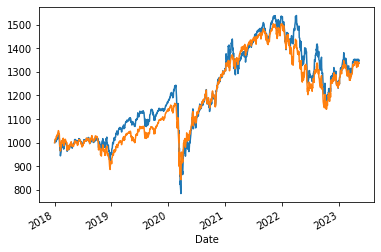

In [7]:
strategy.value.plot()
rr.mul(1000).plot()